In [1]:
train_df <- read.csv("../Data//Titanic_train.csv")
head(train_df)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


In [2]:
tail(train_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39,0,5,382652,29.125,,Q
887,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.000,,S
888,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.000,B42,S
889,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NA,1,2,W./C. 6607,23.450,,S
890,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.000,C148,C
891,891,0,3,"Dooley, Mr. Patrick",male,32,0,0,370376,7.750,,Q


In [3]:
str(train_df)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 191 358 277 16 559 520 629 417 581 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 597 670 50 473 276 86 396 345 133 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 83 1 57 1 1 131 1 1 1 ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


### 컬럼 내용 확인
- Survived : 생존여부, 0=사망, 1=생존
- Pclass : 티켓 등급 1=1등급, 2=2등급 ,3=3등급 
- SibSp : 함께 탑승한 형제, 자매, 배우자의 수 
- Parch : 함께 탑승한 부모, 자식의 수 
- Fare : 운임(짐에대한 비용)
- Cabin : 객실 번호 
- Embarked : 탑승항구, C=Chersbourg(오스트리아),Q=Queenstown(영국),S=Southampton (영국) 

In [4]:
# 각 컬럼별 NA 확인
sum(is.na(train_df))

colSums(is.na(train_df))  #컬럼별로 합을 알려줌 

[1] 177

PassengerId    Survived      Pclass        Name         Sex         Age 
          0           0           0           0           0         177 
      SibSp       Parch      Ticket        Fare       Cabin    Embarked 
          0           0           0           0           0           0

In [5]:
177/891
#177개를 빼고 머신러닝을 만들수도 있음 지금 age를 채울 수 있는 연관된 데이터가 없음 

[1] 0.1986532

In [6]:
# train_df$Age가 NA인것 빼고 데이터셋 만들기

nrow(subset(train_df,Age!='NA'))
nrow(subset(train_df, !is.na(train_df$Age)))

[1] 714

[1] 714

In [7]:
# Survived 기준으로 Dataset 정렬
library(dplyr)
options(warn = -1)
train_df <- arrange(train_df,Survived)
print(head(train_df))


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



  PassengerId Survived Pclass                           Name  Sex Age SibSp
1           1        0      3        Braund, Mr. Owen Harris male  22     1
2           5        0      3       Allen, Mr. William Henry male  35     0
3           6        0      3               Moran, Mr. James male  NA     0
4           7        0      1        McCarthy, Mr. Timothy J male  54     0
5           8        0      3 Palsson, Master. Gosta Leonard male   2     3
6          13        0      3 Saundercock, Mr. William Henry male  20     0
  Parch    Ticket    Fare Cabin Embarked
1     0 A/5 21171  7.2500              S
2     0    373450  8.0500              S
3     0    330877  8.4583              Q
4     0     17463 51.8625   E46        S
5     1    349909 21.0750              S
6     0 A/5. 2151  8.0500              S


In [194]:
tail(train_df)
table(train_df$Survived)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28,1,0,P/PP 3381,24.0000,,C
887,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15,0,0,2667,7.2250,,C
888,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56,0,1,11767,83.1583,C50,C
889,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25,0,1,230433,26.0000,,S
890,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S
891,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C



  0   1 
549 342 

In [9]:
# 정렬된 크기 확인하기 
dim(train_df)

[1] 891  12

# Target Column : Survived 분석 및 확인

In [10]:
table(train_df$Survived)


  0   1 
549 342 

In [11]:
# Survived의 생존과 사망 Count 확인 및 비율 계산하기

#사망자수
sum(train_df$Survived==0)

#생존자수
sum(train_df$Survived==1)

#생존자수의 비율
sum(train_df$Survived==1)/nrow(train_df)

[1] 549

[1] 342

[1] 0.3838384

In [12]:
# 생존율 3D pie 만들기 
per<- data.frame( 사망=round(sum(train_df$Survived==0)/nrow(train_df)*100,2),생존=round(sum(train_df$Survived==1)/nrow(train_df)*100,2))

In [13]:
per
pert<-t(per)
pert

사망,생존
61.62,38.38


사망,61.62
생존,38.38


In [14]:
library(plotrix)

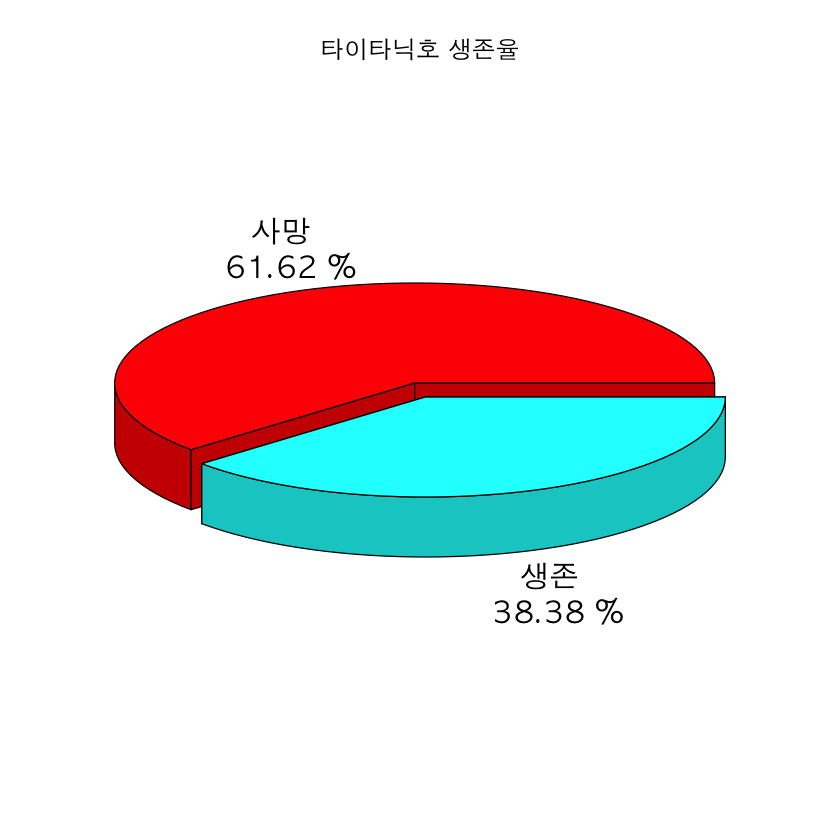

In [15]:
par(family ="AppleGothic")
label <- paste(colnames(per),"\n",pert,"%")
pie3D(pert,
     main="타이타닉호 생존율",
       explode=0.05,
      labels=label
     )

In [16]:
# 생존수와 사망수 막대그래프로 나타내보기
countall <-c(sum(train_df$Survived==0),sum(train_df$Survived==1))
countall

[1] 549 342

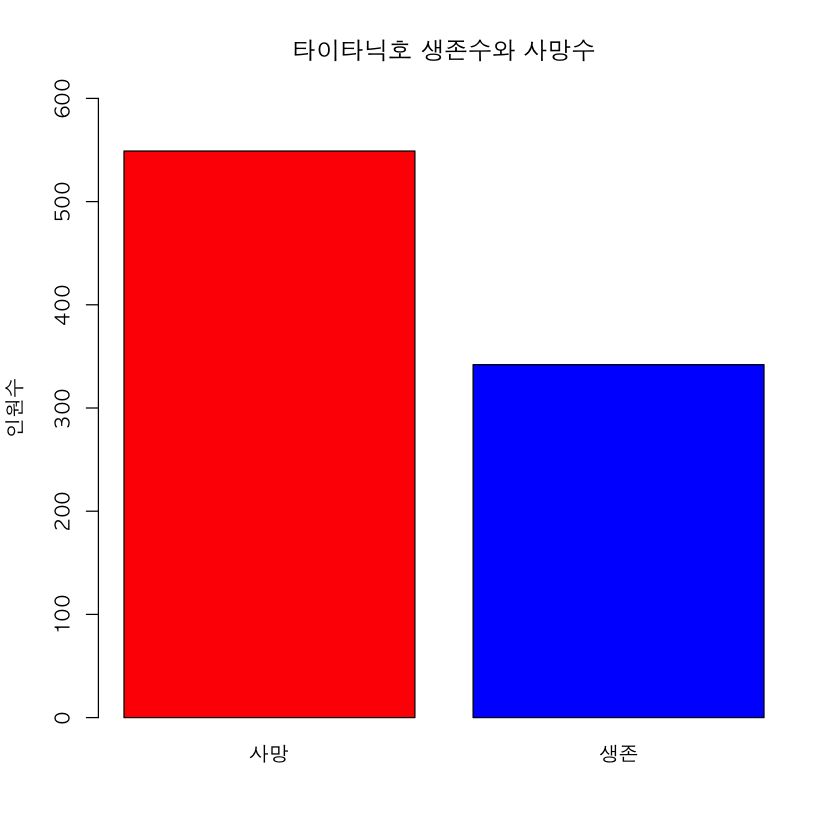

In [17]:
par(family ="AppleGothic")
barplot(countall,
        main="타이타닉호 생존수와 사망수",
       ylim=c(0,600),
        ylab="인원수",
       col=c("red","blue"),
       names=c("사망","생존"))

> Target Column으로 Survived 를 선정

---
# Feature column 찾기

In [18]:
head(train_df)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S
13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,,S


### Sex컬럼 확인

In [19]:
# Sex 컬럼 분류확인
unique(train_df$Sex)
table(train_df$Sex)

[1] male   female
Levels: female male


female   male 
   314    577 

In [20]:
# 여성과 남성의 인원 확인
femaleCount <-sum(train_df$Sex=='female')
maleCount <-sum(train_df$Sex=='male')

femaleCount
maleCount

[1] 314

[1] 577

In [21]:
table(train_df$Survived,train_df$Sex)
#여성의 생존수와 사망수
femaledeath <-table(train_df$Survived,train_df$Sex)[1]
femaleSurvive <-table(train_df$Survived,train_df$Sex)[2]
#남성의 생존수와 사망수 
maledeath  <-table(train_df$Survived,train_df$Sex)[3]
maleSurvive <- table(train_df$Survived,train_df$Sex)[4]


   
    female male
  0     81  468
  1    233  109

In [22]:
# 여성의 생존율과 사망율
femalesurviveper <-round(femaleSurvive/(femaledeath+femaleSurvive)*100,2)
femaledeathper<-round(femaledeath/(femaledeath+femaleSurvive)*100,2)
cat("여성의 생존율 :",femalesurviveper,"%\n")
cat("여성의 사망율 :",femaledeathper,"%\n")

여성의 생존율 : 74.2 %
여성의 사망율 : 25.8 %


In [23]:
# 남성의 생존율과 사망율
malesurviveper <-round(maleSurvive/(maledeath+maleSurvive)*100,2)
maledeathper<-round(maledeath/(maledeath+maleSurvive)*100,2)
cat("남성의 생존율 :",malesurviveper,"%\n")
cat("남성의 사망율 :",maledeathper,"%\n")

남성의 생존율 : 18.89 %
남성의 사망율 : 81.11 %


> Sex 컬럼은 Feature로 적합 <br>
> [survived] <- [sex] <br>
> feature 컬럼은 홀수개가 있어야 함

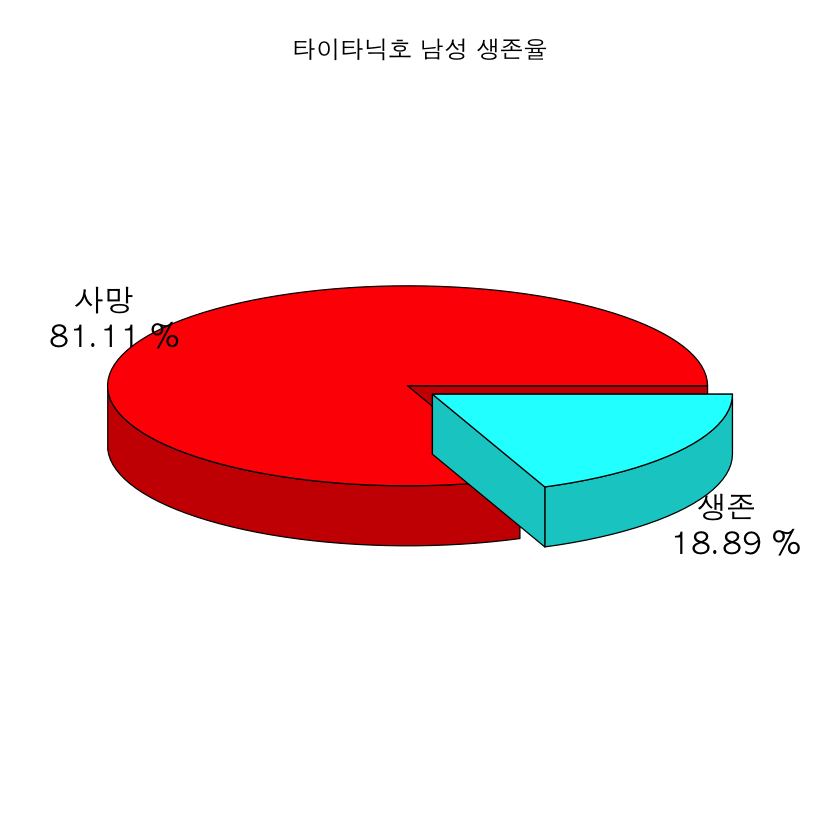

In [24]:
# 남성 생존률 파이차트 
piemale <-c(maledeathper,malesurviveper)
par(family ="AppleGothic")
label <- paste(c("사망","생존"),"\n",piemale ,"%")
pie3D(piemale,
     main="타이타닉호 남성 생존율",
       explode=0.05,
      labels=label
     )

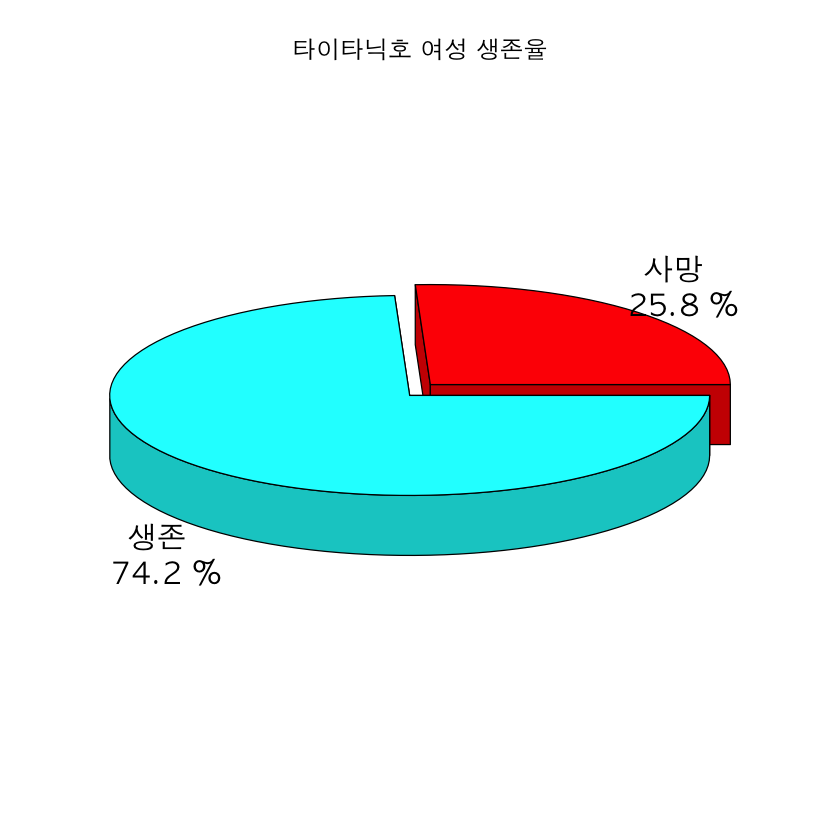

In [25]:
# 여성성 생존률 파이차트 
piefemale <-c(femaledeathper,femalesurviveper)
par(family ="AppleGothic")
label <- paste(c("사망","생존"),"\n",piefemale ,"%")
pie3D(piefemale,
     main="타이타닉호 여성 생존율",
       explode=0.05,
      labels=label
     )

[1] 314 577

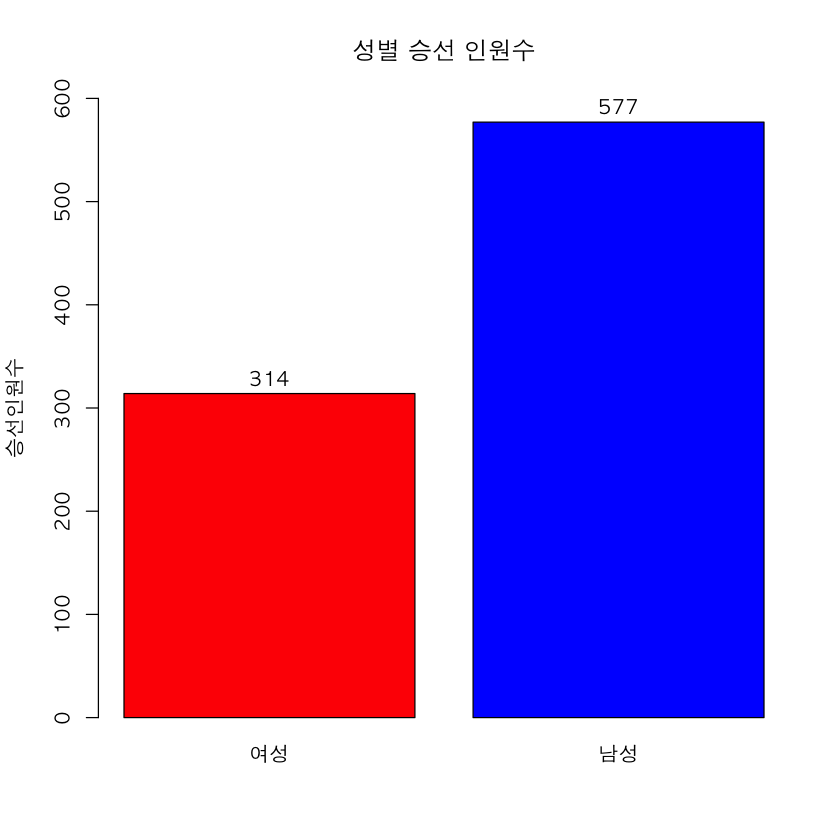

In [26]:
# 승선인원수 막대그래프 

par(family="AppleGothic")
countall <- c(sum(train_df$Sex=='female'),sum(train_df$Sex=='male'))
countall
barplot(countall,
       ylim=c(0,600),
       ylab="승선인원수",
       names=c("여성","남성"),
       main="성별 승선 인원수",
       col=c("red","blue"))
for(i in 0:1)
text(i*1.2+0.7, countall[i+1]+15,countall[i+1])

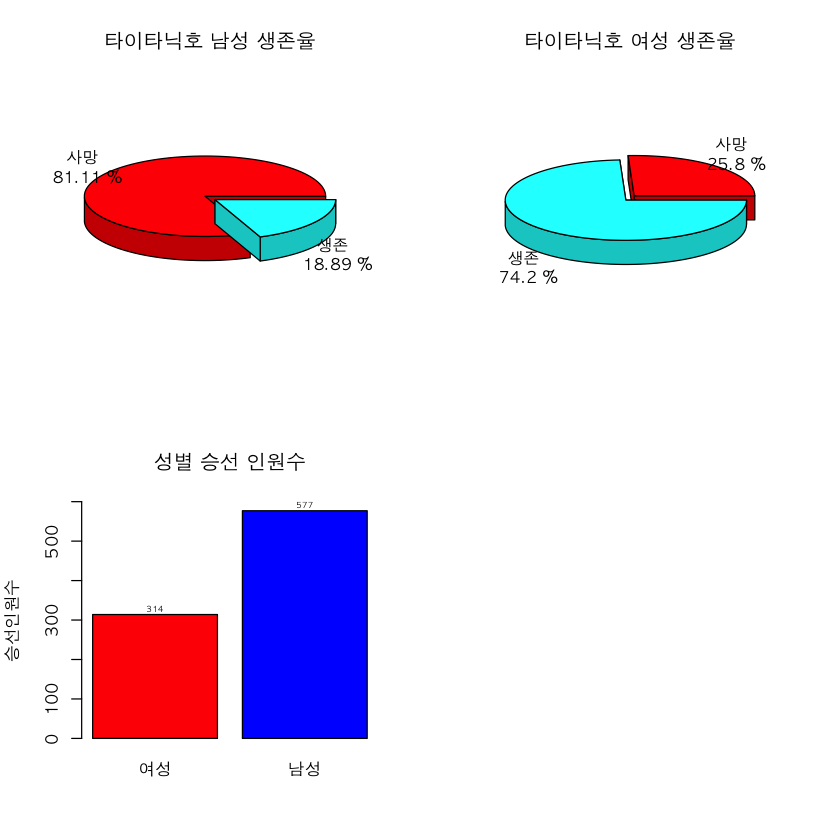

In [27]:
par(mfrow=c(2,2))

#남성생존율
piemale <-c(maledeathper,malesurviveper)
par(family ="AppleGothic")
label <- paste(c("사망","생존"),"\n",piemale ,"%")
pie3D(piemale,
     main="타이타닉호 남성 생존율",
       explode=0.05,
      labels=label,
      labelcex=0.8
     )
#여성생존율
piefemale <-c(femaledeathper,femalesurviveper)

label <- paste(c("사망","생존"),"\n",piefemale ,"%")
pie3D(piefemale,
     main="타이타닉호 여성 생존율",
       explode=0.05,
      labels=label,
      labelcex=0.8
     )
#성별승선인원수

countall <- c(sum(train_df$Sex=='female'),sum(train_df$Sex=='male'))
barplot(countall,
       ylim=c(0,600),
       ylab="승선인원수",
       names=c("여성","남성"),
       main="성별 승선 인원수",
       col=c("red","blue"))
for(i in 0:1)
text(i*1.2+0.7, countall[i+1]+15,countall[i+1],
    cex=0.5)

In [28]:
head(train_df)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S
13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,,S


---
### 티켓 등급 분석

In [29]:
table(train_df$Pclass)


  1   2   3 
216 184 491 

In [30]:
# 1등 객실의 여성 생존율
table(train_df$Pclass,train_df$Survived,train_df$Sex)

, ,  = female

   
      0   1
  1   3  91
  2   6  70
  3  72  72

, ,  = male

   
      0   1
  1  77  45
  2  91  17
  3 300  47


In [31]:
cat("1등 객실의 여성 생존율은",nrow(subset(train_df,train_df$Pclass==1&train_df$Survived==1&train_df$Sex=='female')),"/",nrow(subset(train_df,train_df$Pclass==1&train_df$Sex=='female')))

cat("\n",round(nrow(subset(train_df,train_df$Pclass==1&train_df$Survived==1&train_df$Sex=='female'))/nrow(subset(train_df,train_df$Pclass==1&train_df$Sex=='female'))*100,2),"%")

1등 객실의 여성 생존율은 91 / 94
 96.81 %

In [32]:
for(i in 1:3){
cat(i,"등 객실의 여성 생존율은",nrow(subset(train_df,train_df$Pclass==i&train_df$Survived==1&train_df$Sex=='female')),"/",nrow(subset(train_df,train_df$Pclass==i&train_df$Sex=='female')))

cat("\t",round(nrow(subset(train_df,train_df$Pclass==i&train_df$Survived==1&train_df$Sex=='female'))/nrow(subset(train_df,train_df$Pclass==i&train_df$Sex=='female'))*100,2),"%","\n")
    }
              

1 등 객실의 여성 생존율은 91 / 94	 96.81 % 
2 등 객실의 여성 생존율은 70 / 76	 92.11 % 
3 등 객실의 여성 생존율은 72 / 144	 50 % 


In [33]:
a<- unique(train_df$Sex)

sex<-c("남자","여자")


In [34]:

for(j in 2:1){
for(i in 1:3){
    
cat("\n",i,"등 객실의",sex[j], "생존율은",nrow(subset(train_df,train_df$Pclass==i&train_df$Survived==1&train_df$Sex==a[j])),"/",nrow(subset(train_df,train_df$Pclass==i&train_df$Sex==a[j])))

cat("\t",round(nrow(subset(train_df,train_df$Pclass==i&train_df$Survived==1&train_df$Sex==a[j]))/nrow(subset(train_df,train_df$Pclass==i&train_df$Sex==a[j]))*100,2),"%","\n")
    }
    cat("-----------------------------------------\t")
           } 



 1 등 객실의 여자 생존율은 91 / 94	 96.81 % 

 2 등 객실의 여자 생존율은 70 / 76	 92.11 % 

 3 등 객실의 여자 생존율은 72 / 144	 50 % 
-----------------------------------------	
 1 등 객실의 남자 생존율은 45 / 122	 36.89 % 

 2 등 객실의 남자 생존율은 17 / 108	 15.74 % 

 3 등 객실의 남자 생존율은 47 / 347	 13.54 % 
-----------------------------------------	

In [35]:
b<-0
for(j in 2:1){
for(i in 1:3){
    
b<-c(b,round(nrow(subset(train_df,train_df$Pclass==i&train_df$Survived==1&train_df$Sex==a[j]))/nrow(subset(train_df,train_df$Pclass==i&train_df$Sex==a[j]))*100,2))
    
}
           } 
b

[1]  0.00 96.81 92.11 50.00 36.89 15.74 13.54

In [36]:
b[-1]

[1] 96.81 92.11 50.00 36.89 15.74 13.54

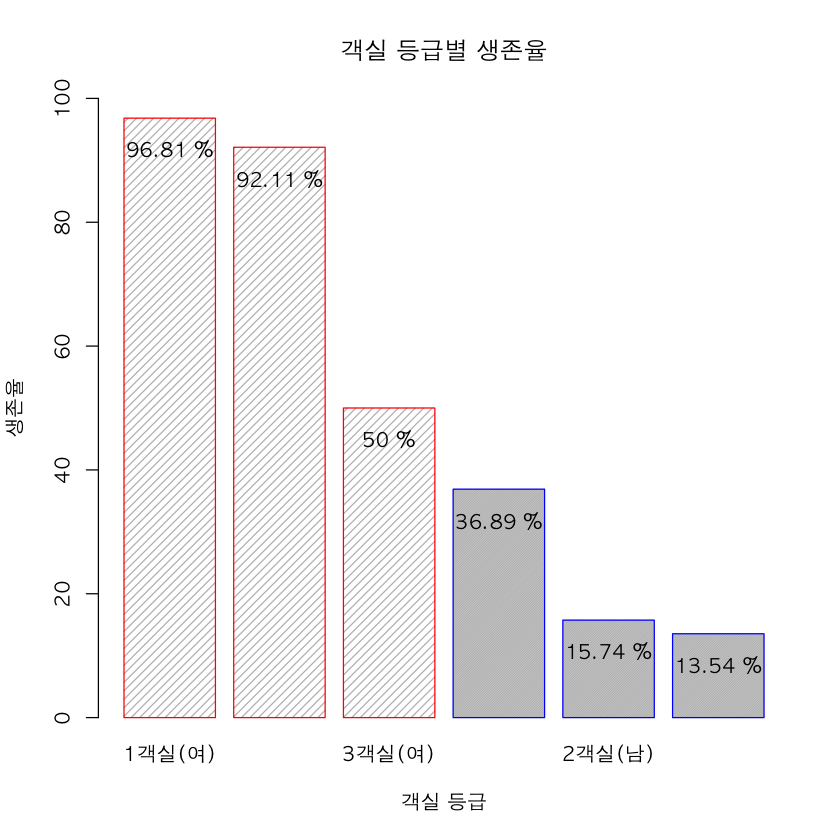

In [37]:
par(family="AppleGothic")
barplot(b[-1],
       ylim=c(0,100),
       ylab="생존율",
       xlab="객실 등급",
       main="객실 등급별 생존율",
       names=c("1객실(여)","2객실(여)","3객실(여)","1객실(남)","2객실(남)","3객실(남)"),
       density=c(rep(20,3),rep(100,3)),
         border =c(rep('red',3),rep('blue',3)),
                 )
for(i in 0:5){
text(i*1.2+0.7,b[i+2]-5,paste(b[i+2],"%"))
    }

> [Survived] <-[Sex,Pclass]

In [38]:
head(train_df)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S
13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,,S


---
### Embarked (항구의 위치)

In [39]:
table(train_df$Embarked)


      C   Q   S 
  2 168  77 644 

In [40]:
# 빈칸의 데이터 찾기
subset(train_df,Embarked=="")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
577,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80,B28,
868,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80,B28,


In [41]:
# 제일 많은 운임을 지불한 사람은?
subset(train_df,Fare==max(train_df$Fare))


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
639,259,1,1,"Ward, Miss. Anna",female,35,0,0,PC 17755,512.3292,,C
814,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36,0,1,PC 17755,512.3292,B51 B53 B55,C
836,738,1,1,"Lesurer, Mr. Gustave J",male,35,0,0,PC 17755,512.3292,B101,C


In [42]:
mean(train_df$Fare)

[1] 32.20421

In [43]:
# 항구 별 탑승인원을 구하여 가장 맣은 탑승인원의 항구로 결정
# S 항구 탑승인원
table(train_df$Embarked)[4]
# C항구 탑승인원
table(train_df$Embarked)[2]
# Q항구 탑승인원
table(train_df$Embarked)[3]

S 
644

C 
168

Q 
77

> 빈값 항구를 S항구로 변경



In [44]:
#연습을 위한 데이터셋 복제
train_df_T<-train_df


In [45]:
# 빈칸항구 찾기 -1
subset(train_df_T,Embarked=="")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
577,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80,B28,
868,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80,B28,


In [46]:
# 빈칸항구 찾기 -2
train_df_T[train_df_T$Embarked=="",]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
577,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80,B28,
868,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80,B28,


In [47]:
# 빈칸 항구를 S 항구로 변경 -1
train_df_T$Embarked <- ifelse(train_df_T$Embarked=="",'S',train_df_T$Embarked)

In [48]:
subset(train_df_T,Embarked=="")

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [49]:
# 빈칸 항구를 S 항구로 변경 -2
train_df_T <- train_df

In [50]:
subset(train_df_T,Embarked=="")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
577,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80,B28,
868,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80,B28,


In [51]:
train_df_T [train_df_T$Embarked=="",]$Embarked <-"S"

In [52]:
subset(train_df_T,Embarked=="")

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [53]:
# 빈칸 항구를 S 항구로 변경 -3
train_df_T <- train_df

In [54]:
train_df_T$Embarked[train_df_T$Embarked==""] <-"S"

---

In [55]:
train_df$Embarked[train_df$Embarked==""] <-"S"

In [56]:
# S 항구 탑승인원
table(train_df$Embarked)[4]

S 
646

In [57]:
# factor 정리해주기 
train_df$Embarked <-factor(train_df$Embarked)
str(train_df)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 5 6 7 8 13 14 15 17 19 ...
 $ Survived   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Pclass     : int  3 3 3 1 3 3 3 3 3 3 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 16 559 520 629 734 29 847 687 846 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 2 2 2 2 2 2 1 2 1 ...
 $ Age        : num  22 35 NA 54 2 20 39 14 2 31 ...
 $ SibSp      : int  1 0 0 0 3 0 1 0 4 1 ...
 $ Parch      : int  0 0 0 0 1 0 5 0 1 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 473 276 86 396 536 334 414 481 302 ...
 $ Fare       : num  7.25 8.05 8.46 51.86 21.07 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 1 1 131 1 1 1 1 1 1 ...
 $ Embarked   : Factor w/ 3 levels "C","Q","S": 3 3 2 3 3 3 3 3 2 3 ...


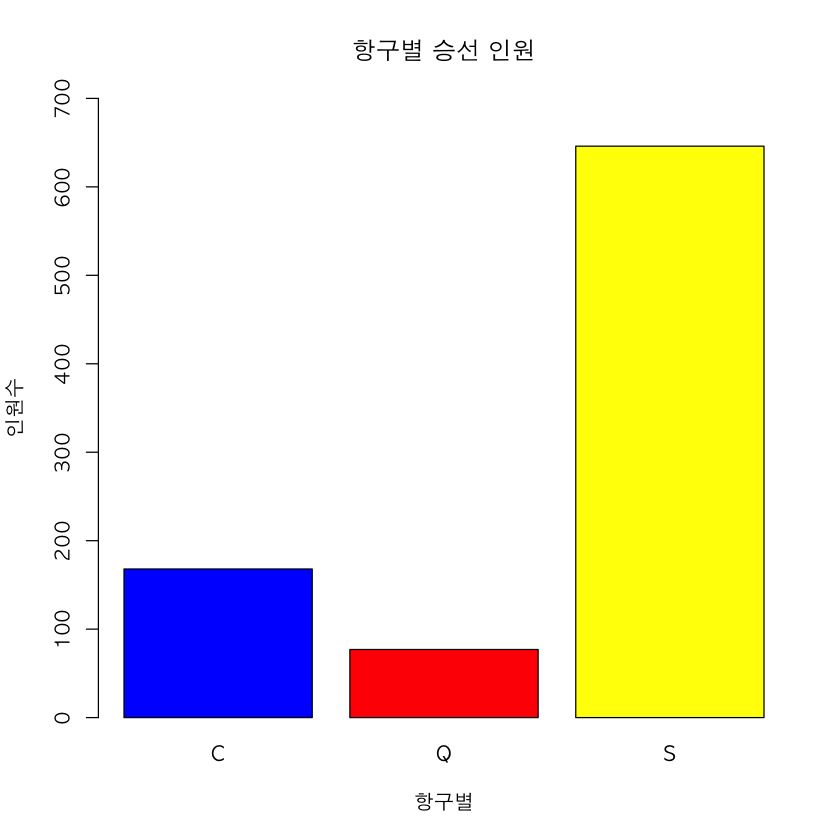

In [58]:
# 항구별 승선 인원
par(family ="AppleGothic")
barplot(table(train_df$Embarked),
       main="항구별 승선 인원",
       xlab="항구별",
       ylab="인원수",
    col=c("blue","red","yellow"),
       ylim=c(0,700))

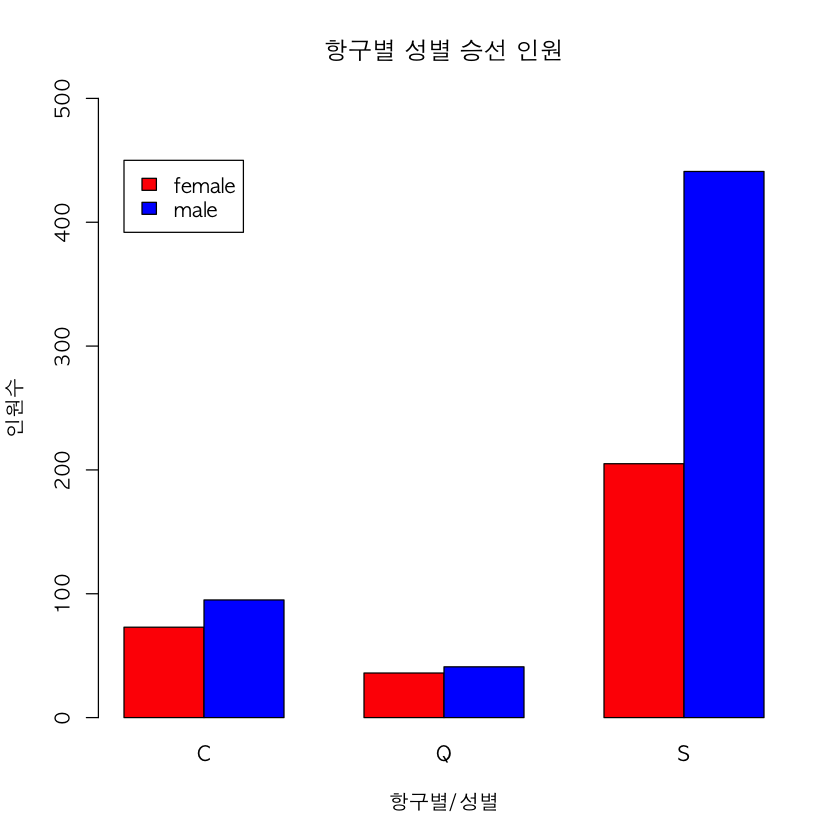

In [59]:
# 항구별 승선 인원
par(family ="AppleGothic")
barplot(table(train_df$Sex,train_df$Embarked),
        beside=T,
       main="항구별 성별 승선 인원",
       xlab="항구별/성별",
       ylab="인원수",
    col=c("red","blue"),
       ylim=c(0,500),
      )

legend(1,450,
      rownames(table(train_df$Sex,train_df$Embarked)),
       cex=1,
       fill=c("red","blue")
      
      )

In [60]:
table(train_df$Sex,train_df$Embarked)

        
           C   Q   S
  female  73  36 205
  male    95  41 441

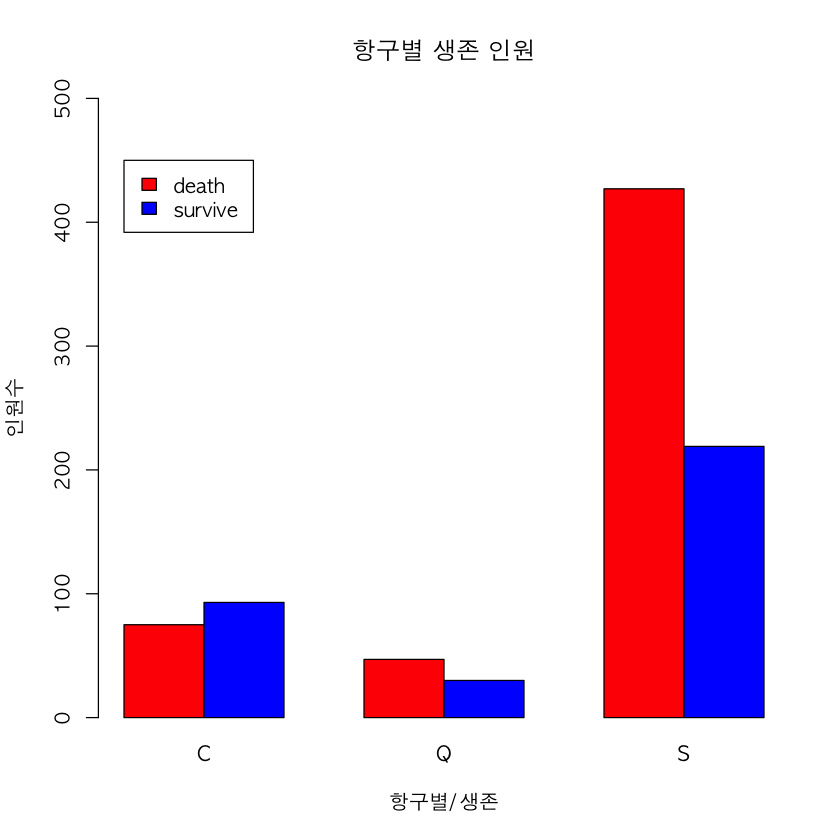

In [61]:
# 항구별 생존 인원
par(family ="AppleGothic")
barplot(table(train_df$Survived,train_df$Embarked),
        beside=T,
       main="항구별 생존 인원",
       xlab="항구별/생존",
       ylab="인원수",
    col=c("red","blue"),
       ylim=c(0,500),
      )

legend(1,450,
      c("death","survive"),
       cex=1,
       fill=c("red","blue")
      
      )


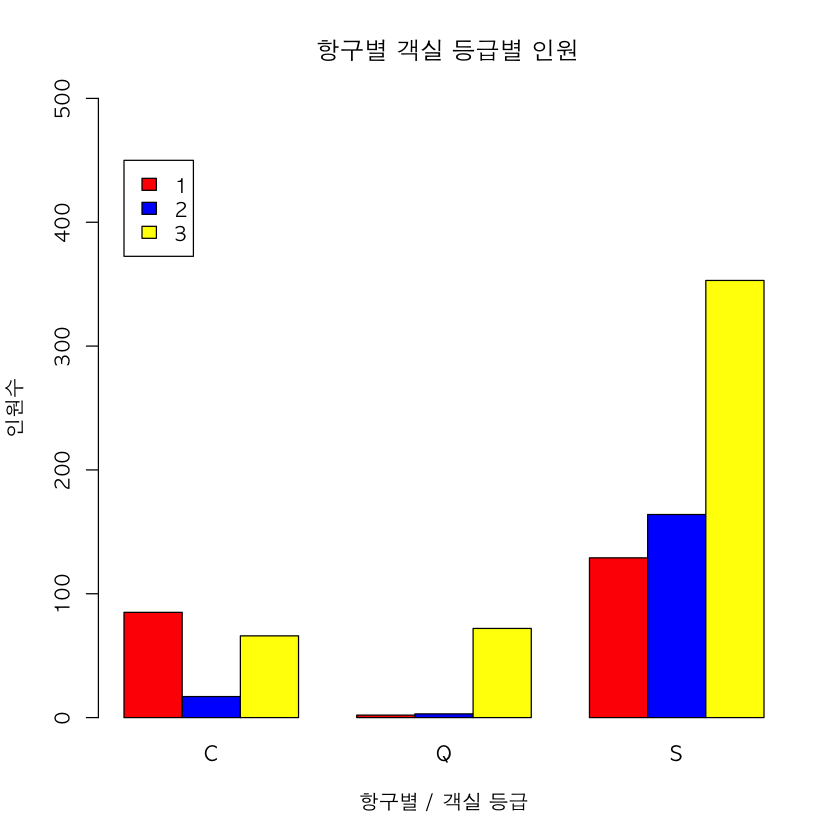

In [62]:
# 항구별 객실 등급별 인원
par(family ="AppleGothic")
barplot(table(train_df$Pclass,train_df$Embarked),
        beside=T,
       main=" 항구별 객실 등급별 인원",
       xlab="항구별 / 객실 등급",
       ylab="인원수",
    col=c("red","blue","yellow"),
       ylim=c(0,500),
      )

legend(1,450,
    c(1,2,3),
       cex=1,
       fill=c("red","blue","yellow")
      
      )

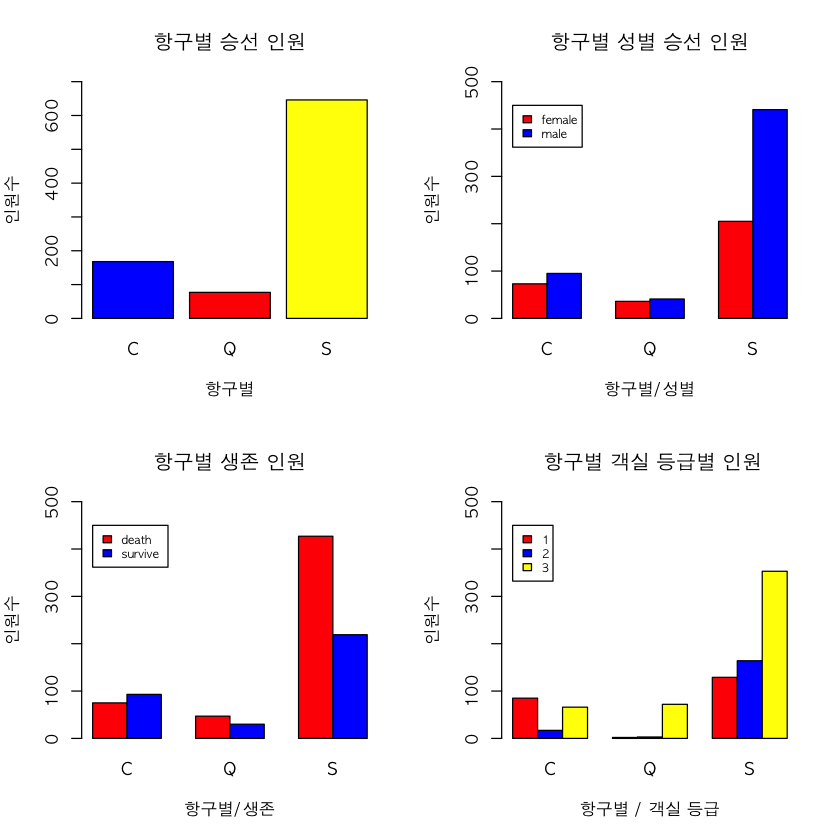

In [63]:
# 그래프 한눈에 보기

par(mfrow=c(2,2))
# 항구별 승선 인원
par(family ="AppleGothic")
barplot(table(train_df$Embarked),
       main="항구별 승선 인원",
       xlab="항구별",
       ylab="인원수",
    col=c("blue","red","yellow"),
       ylim=c(0,700))
# 항구별 성별 승선 인원
par(family ="AppleGothic")
barplot(table(train_df$Sex,train_df$Embarked),
        beside=T,
       main="항구별 성별 승선 인원",
       xlab="항구별/성별",
       ylab="인원수",
    col=c("red","blue"),
       ylim=c(0,500),
      )

legend(1,450,
      rownames(table(train_df$Sex,train_df$Embarked)),
       cex=0.7,
       fill=c("red","blue")
      
      )
# 항구별 생존 인원
par(family ="AppleGothic")
barplot(table(train_df$Survived,train_df$Embarked),
        beside=T,
       main="항구별 생존 인원",
       xlab="항구별/생존",
       ylab="인원수",
    col=c("red","blue"),
       ylim=c(0,500),
      )

legend(1,450,
      c("death","survive"),
       cex=0.7,
       fill=c("red","blue")
      
      )
# 항구별 객실 등급별 인원
par(family ="AppleGothic")
barplot(table(train_df$Pclass,train_df$Embarked),
        beside=T,
       main=" 항구별 객실 등급별 인원",
       xlab="항구별 / 객실 등급",
       ylab="인원수",
    col=c("red","blue","yellow"),
       ylim=c(0,500),
      )

legend(1,450,
    c(1,2,3),
       cex=0.7,
       fill=c("red","blue","yellow")
      
      )

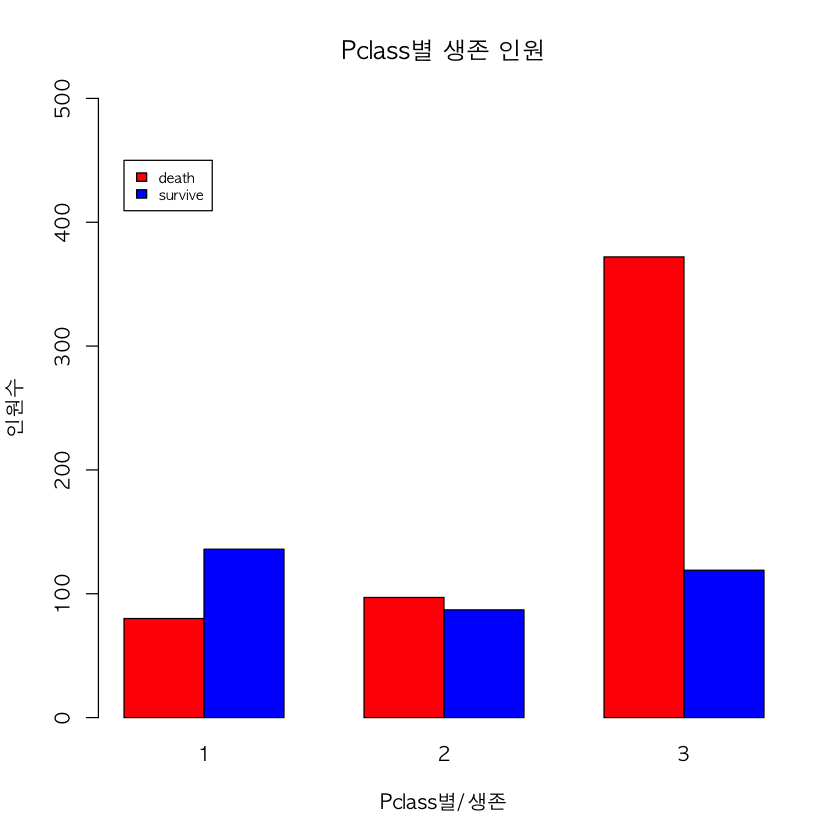

In [192]:
# Pclass별 생존 인원
par(family ="AppleGothic")
barplot(table(train_df$Survived,train_df$Pclass),
        beside=T,
       main="Pclass별 생존 인원",
       xlab="Pclass별/생존",
       ylab="인원수",
    col=c("red","blue"),
       ylim=c(0,500),
      )

legend(1,450,
      c("death","survive"),
       cex=0.7,
       fill=c("red","blue"))
      

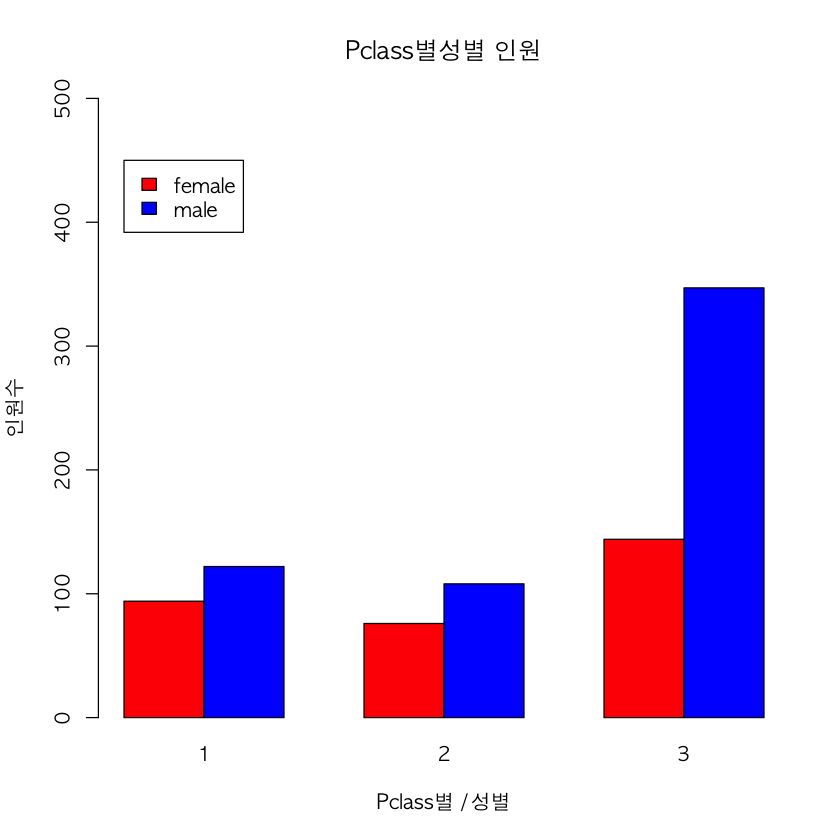

In [193]:
# Pclass별 성별 인원
par(family ="AppleGothic")
barplot(table(train_df$Sex,train_df$Pclass),
        beside=T,
       main="Pclass별성별 인원",
       xlab="Pclass별 /성별",
       ylab="인원수",
    col=c("red","blue"),
       ylim=c(0,500),
      )

legend(1,450,
      rownames(table(train_df$Sex,train_df$Pclass)),
       cex=1,
       fill=c("red","blue")
      
      )

---
# RandomForest로 예측모델 생성

In [64]:
# 복사본
train_df_T <- train_df

In [65]:
# 예측을 위한 컬럼확인
target_col <-c("Survived","Sex","Pclass","Embarked")
head(train_df_T[,target_col])

Survived,Sex,Pclass,Embarked
0,male,3,S
0,male,3,S
0,male,3,Q
0,male,1,S
0,male,3,S
0,male,3,S


In [66]:
# 성별 컬럼을 숫자로 전환
train_df_T$SexCode[train_df_T$Sex=="male"] <-0
train_df_T$SexCode[train_df_T$Sex=="female"] <-1

In [67]:
head(train_df_T)
tail(train_df_T)


PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexCode
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S,0
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S,0
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q,0
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,0
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S,0
13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,,S,0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexCode
886,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28,1,0,P/PP 3381,24.0000,,C,1
887,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15,0,0,2667,7.2250,,C,1
888,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56,0,1,11767,83.1583,C50,C,1
889,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25,0,1,230433,26.0000,,S,1
890,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S,1
891,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C,0


In [68]:
# Sex 컬럼 삭제

train_df_T <-subset(train_df_T,select= -Sex)
head(train_df_T)

PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexCode
1,0,3,"Braund, Mr. Owen Harris",22,1,0,A/5 21171,7.2500,,S,0
5,0,3,"Allen, Mr. William Henry",35,0,0,373450,8.0500,,S,0
6,0,3,"Moran, Mr. James",NA,0,0,330877,8.4583,,Q,0
7,0,1,"McCarthy, Mr. Timothy J",54,0,0,17463,51.8625,E46,S,0
8,0,3,"Palsson, Master. Gosta Leonard",2,3,1,349909,21.0750,,S,0
13,0,3,"Saundercock, Mr. William Henry",20,0,0,A/5. 2151,8.0500,,S,0


In [69]:
target_col <-c("Survived","SexCode
","Pclass","Embarked")
head(train_df_T[,target_col])

ERROR: Error in `[.data.frame`(train_df_T, , target_col): undefined columns selected


### Embarked 를 숫자로 전환
C =0, S=1, Q=2 -> 맞긴 맞지만 좋은 생각이 아니다. 
2*S=Q??
S+S=Q??

### One-Hot Encoding 방법
C ==[1,0,0]
S ==[0,1,0]
Q ==[0,0,1]
처럼 행렬로 만들면 덧셈과 뺄셈에 대해 각각 계산이 굉장히 안전해 진다. <br>
R은 내부적으로 1은 true, 0은 false 로 해석

In [ ]:
train_df_T$Embarked_C = train_df_T$Embarked =='C'
train_df_T$Embarked_S = train_df_T$Embarked =='S'
train_df_T$Embarked_Q = train_df_T$Embarked =='Q'

head(train_df_T[c('Embarked','Embarked_C','Embarked_S',"Embarked_Q")])

In [ ]:
target_col=c("Survived","Pclass","SexCode","Embarked_C","Embarked_S","Embarked_Q")
head(train_df_T[,target_col])

In [ ]:
train_data <- train_df_T[,target_col]

In [ ]:
head(train_data)
str(train_data)

In [ ]:
library(caret)

In [ ]:
#Sampling
set.seed(1234)
samp <- createDataPartition(train_data$Survived,p=0.7,list=F)


In [ ]:
# 학습용 데이터

data.train<- train_data[samp,]
str(data.train)

In [ ]:
# 검증용 데이터

data.test<-train_data[-samp,]
str(data.test)


In [ ]:
library(randomForest)

In [ ]:
# 학습시키기
rf <- randomForest(Survived~.,data=data.train,ntree=100)

In [ ]:
# 문제와 정답
x<- subset(data.test,select=-Survived)
y<- data.test$Survived

In [ ]:
#검증하기 
pred <- predict(rf, x)
head(pred)

In [ ]:
pred[pred <=0.5] <-0
pred[pred >0.5] <- 1
head(pred)

In [ ]:
mean(pred==y)

---
### Survived를 factor 변환 후에 randomforest 실행

### setseed(1234) 통일
### 정확도 5번 평균 

In [112]:
data.train$Survived <- as.factor(data.train$Survived)
data.test$Survived <- as.factor(data.test$Survived)

In [113]:
set.seed(1234)
rf <- randomForest(Survived~.,data=data.train,ntree=100)

In [114]:
x<- subset(data.test,select=-Survived)
y<- data.test$Survived

In [115]:
pred <- predict(rf, x)
head(pred)

5 14 34 40 47 48 
 0  0  0  0  0  0 
Levels: 0 1

In [116]:
mean(pred==y)
table(pred,y)

[1] 0.7887324

    y
pred  0  1
   0 75 27
   1  3 37

In [117]:
# 인공 신경망 함수
 library(nnet)
    model.nnet =nnet(Survived~ ., data=data.train, size=3)
    pred=predict(model.nnet,x, type="class")
  mean(pred == y)

# weights:  49
initial  value 439.130849 
iter  10 value 240.387060
iter  20 value 235.215594
iter  30 value 232.755264
iter  40 value 229.559949
iter  50 value 225.628362
iter  60 value 224.501582
iter  70 value 223.050230
iter  80 value 222.379534
iter  90 value 222.073013
iter 100 value 221.879576
final  value 221.879576 
stopped after 100 iterations


[1] 0.7816901

---
### 팀 프로젝트

In [118]:
train_df_T <- train_df
train_df_T
table(train_df_T$Age)
str(train_df_T)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S
13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,,S
14,0,3,"Andersson, Mr. Anders Johan",male,39,1,5,347082,31.2750,,S
15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14,0,0,350406,7.8542,,S
17,0,3,"Rice, Master. Eugene",male,2,4,1,382652,29.1250,,Q
19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)",female,31,1,0,345763,18.0000,,S



0.42 0.67 0.75 0.83 0.92    1    2    3    4    5    6    7    8    9   10   11 
   1    1    2    2    1    7   10    6   10    4    3    3    4    8    2    4 
  12   13   14 14.5   15   16   17   18   19   20 20.5   21   22   23 23.5   24 
   1    2    6    1    5   17   13   26   25   15    1   24   27   15    1   30 
24.5   25   26   27   28 28.5   29   30 30.5   31   32 32.5   33   34 34.5   35 
   1   23   18   18   25    2   20   25    2   17   18    2   15   15    1   18 
  36 36.5   37   38   39   40 40.5   41   42   43   44   45 45.5   46   47   48 
  22    1    6   11   14   13    2    6   13    5    9   12    2    3    9    9 
  49   50   51   52   53   54   55 55.5   56   57   58   59   60   61   62   63 
   6   10    7    6    1    8    2    1    4    2    5    2    4    3    4    2 
  64   65   66   70 70.5   71   74   80 
   2    3    1    2    1    2    1    1 

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 5 6 7 8 13 14 15 17 19 ...
 $ Survived   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Pclass     : int  3 3 3 1 3 3 3 3 3 3 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 16 559 520 629 734 29 847 687 846 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 2 2 2 2 2 2 1 2 1 ...
 $ Age        : num  22 35 NA 54 2 20 39 14 2 31 ...
 $ SibSp      : int  1 0 0 0 3 0 1 0 4 1 ...
 $ Parch      : int  0 0 0 0 1 0 5 0 1 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 473 276 86 396 536 334 414 481 302 ...
 $ Fare       : num  7.25 8.05 8.46 51.86 21.07 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 1 1 131 1 1 1 1 1 1 ...
 $ Embarked   : Factor w/ 3 levels "C","Q","S": 3 3 2 3 3 3 3 3 2 3 ...


In [119]:
train_df_T<-train_df_T[!is.na(train_df_T$Age),]
head(train_df_T)
tail(train_df_T)
sum(is.na(train_df_T$Age))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
4,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
5,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S
6,13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,,S
7,14,0,3,"Andersson, Mr. Anders Johan",male,39,1,5,347082,31.2750,,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28,1,0,P/PP 3381,24.0000,,C
887,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15,0,0,2667,7.2250,,C
888,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56,0,1,11767,83.1583,C50,C
889,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25,0,1,230433,26.0000,,S
890,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S
891,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C


[1] 0

In [184]:

# 나이 컬럼을 숫자로 전환 (11세보다 어리면 0, 18세이상은 1)
train_df_T$SexCode[train_df_T$Sex=="male"] <-0
train_df_T$SexCode[train_df_T$Sex=="female"] <-1
train_df_T$AgeCode[train_df_T$Age<15] <-0
train_df_T$AgeCode[train_df_T$Age>=15] <-1
train_df_T$Embarked_C = train_df_T$Embarked =='C'
train_df_T$Embarked_S = train_df_T$Embarked =='S'
train_df_T$Embarked_Q = train_df_T$Embarked =='Q'



In [188]:
# Pclass별 여성, 아동 컬럼
# Pclass 1 female
train_df_T$P1Female = train_df_T$Pclass == 1 & train_df_T$SexCode == 1
# Pclass 2 female
train_df_T$P2Female = train_df_T$Pclass == 2 & train_df_T$SexCode == 1
# Pclass 3 female
train_df_T$P3Female = train_df_T$Pclass == 3 & train_df_T$SexCode == 1

# Pclass 1 어린이(11세이하)
train_df_T$P1Child = train_df_T$Pclass == 1 & train_df_T$AgeCode == 0
# Pclass 2 어린이(11세이하)
train_df_T$P2Child = train_df_T$Pclass == 2 & train_df_T$AgeCode == 0
# Pclass 3 어린이(11세이하)
train_df_T$P3Child = train_df_T$Pclass == 3 & train_df_T$AgeCode == 0
#등급1 / 23 나누기 
train_df_T$class1= train_df_T$Pclass == 1 
train_df_T$class23= train_df_T$Pclass == 2 |train_df_T$Pclass == 3

#pclass별 남성 
# Pclass 1 female
train_df_T$P1male = train_df_T$Pclass == 1 & train_df_T$SexCode == 0
# Pclass 2 female
train_df_T$P2male = train_df_T$Pclass == 2 & train_df_T$SexCode == 0
# Pclass 3 female
train_df_T$P3male = train_df_T$Pclass == 3 & train_df_T$SexCode == 0



In [171]:
# 나이 집어넣어서 만들기 

target_c=c("Survived","Pclass","AgeCode","SexCode","Embarked_C","Embarked_S","Embarked_Q","P1Female","P2Female","P3Female","P1Child","P2Child","P3Child","class1","class23","P1male","P2male","P3male")
team <-train_df_T[,target_c]
head(team)
str(team)
table(team$AgeCode)
table(team$Survived)


,Survived,Pclass,AgeCode,SexCode,Embarked_C,Embarked_S,Embarked_Q,P1Female,P2Female,P3Female,P1Child,P2Child,P3Child,class1,class23,P1male,P2male,P3male,feChild
1,0,3,1,0,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE
2,0,3,1,0,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE
4,0,1,1,0,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE
5,0,3,0,0,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE
6,0,3,1,0,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE
7,0,3,1,0,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE


'data.frame':	714 obs. of  19 variables:
 $ Survived  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Pclass    : int  3 3 1 3 3 3 3 3 3 2 ...
 $ AgeCode   : num  1 1 1 0 1 1 0 0 1 1 ...
 $ SexCode   : num  0 0 0 0 0 0 1 0 1 0 ...
 $ Embarked_C: logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ Embarked_S: logi  TRUE TRUE TRUE TRUE TRUE TRUE ...
 $ Embarked_Q: logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ P1Female  : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ P2Female  : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ P3Female  : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ P1Child   : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ P2Child   : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ P3Child   : logi  FALSE FALSE FALSE TRUE FALSE FALSE ...
 $ class1    : logi  FALSE FALSE TRUE FALSE FALSE FALSE ...
 $ class23   : logi  TRUE TRUE FALSE TRUE TRUE TRUE ...
 $ P1male    : logi  FALSE FALSE TRUE FALSE FALSE FALSE ...
 $ P2male    : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ P


  0   1 
 78 636 


  0   1 
424 290 

In [172]:
# 인공신경망
library(caret)

samp <- createDataPartition(team$Survived, p=0.8, list=F)
nrow(samp)



[1] 572

In [173]:
data.train<-team[samp,]

table(data.train$Survived)
data.test<-team[-samp,]
data.train$Survived <- as.factor(data.train$Survived)
data.test$Survived <- as.factor(data.test$Survived)


x <- subset(data.test,select=-Survived)
y <- data.test$Survived


  0   1 
335 237 

In [174]:

f<-function(x){library(nnet)
    model.nnet =nnet(Survived ~ ., data=data.train, size=3)
    pred=predict(model.nnet,x, type="class")
    mean(pred == y)
             return(as.matrix(table(pred,y)))  }
f(x)
sum1<-matrix(nrow=2,ncol=2,0)
for(i in 1:5){
 sum1 =f(x)+sum1
   }
print(sum1/5)


# weights:  61
initial  value 557.530051 
iter  10 value 307.063760
iter  20 value 269.542021
iter  30 value 255.518361
iter  40 value 237.187093
iter  50 value 234.775789
iter  60 value 234.105664
iter  70 value 234.082617
iter  80 value 234.066120
iter  90 value 234.065556
iter 100 value 234.064339
final  value 234.064339 
stopped after 100 iterations


    y
pred  0  1
   0 87 23
   1  2 30

# weights:  61
initial  value 380.725151 
iter  10 value 246.187267
iter  20 value 234.510560
iter  30 value 231.927847
iter  40 value 230.564011
iter  50 value 230.016335
iter  60 value 229.654933
iter  70 value 229.430939
iter  80 value 229.364748
iter  90 value 229.322156
iter 100 value 229.298005
final  value 229.298005 
stopped after 100 iterations
# weights:  61
initial  value 405.384407 
iter  10 value 267.138625
iter  20 value 235.464759
iter  30 value 233.844918
iter  40 value 233.474555
iter  50 value 233.407805
iter  60 value 233.378497
iter  70 value 233.358186
iter  80 value 233.257109
iter  90 value 233.045395
iter 100 value 232.947653
final  value 232.947653 
stopped after 100 iterations
# weights:  61
initial  value 397.947475 
iter  10 value 249.687750
iter  20 value 234.357861
iter  30 value 231.251827
iter  40 value 230.645588
iter  50 value 230.290624
iter  60 value 230.167043
iter  70 value 230.144124
iter  80 value 230.136254
iter  90 value 230.134505
iter 100 val

In [175]:
# 의사결정나무 
library(party)
    model.ctree <- ctree(Survived~.,data=data.train)
    pred <- predict(model.ctree,x)
    mean(pred==y)
table(pred,y)

[1] 0.8239437

    y
pred  0  1
   0 87 23
   1  2 30

In [176]:
#randomforest
 library(randomForest)
    model.rf <- randomForest(Survived~., data = data.train, ntree=100)
    pred <- predict(model.rf, x)
    mean(pred==y)
table(pred,y)

[1] 0.8309859

    y
pred  0  1
   0 87 22
   1  2 31

In [177]:
#svm
library(e1071)
    library(caret)

    
    model.svm <- svm(Survived~.,data=data.train)
    pred <- predict(model.svm,x, type="class")
     mean(pred==y)
table(pred,y)

[1] 0.8309859

    y
pred  0  1
   0 87 22
   1  2 31

In [178]:
# 로지스틱 회귀분석

 library(nnet)
library(e1071)
    model <- multinom(Survived ~., data=data.train)
    pred <- predict(model,x, type="class")
     mean(pred==y)
   table(pred,y)


# weights:  20 (19 variable)
initial  value 396.480187 
iter  10 value 240.892850
iter  20 value 235.495619
iter  30 value 235.469793
final  value 235.469749 
converged


[1] 0.8098592

    y
pred  0  1
   0 82 20
   1  7 33

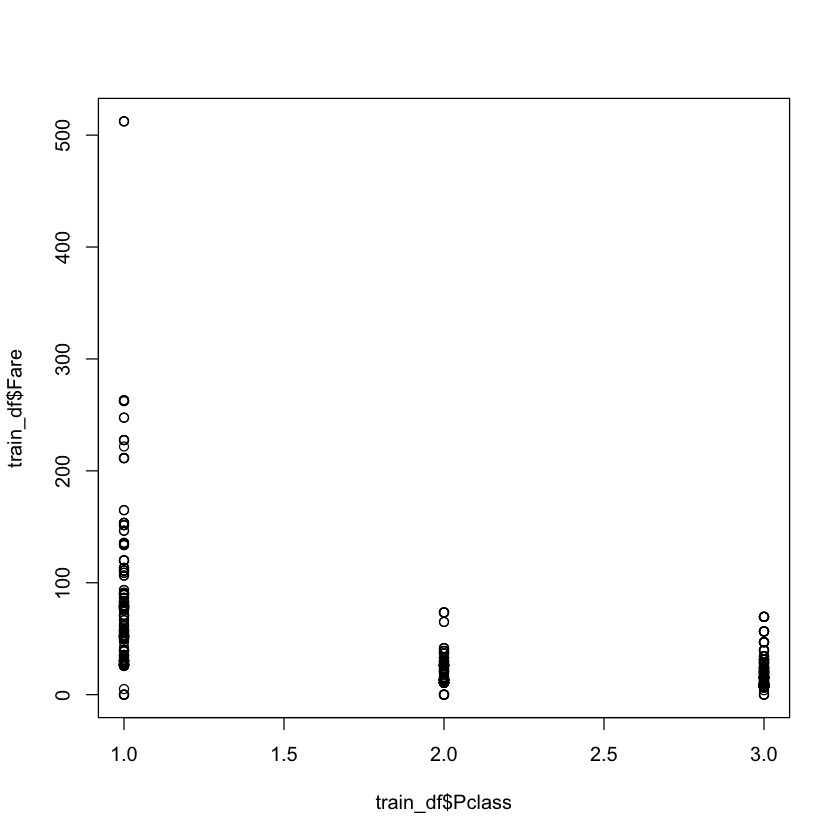

In [157]:
plot(train_df$Pclass,train_df$Fare)